In [331]:
import pandas as pd
import nltk
import re
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [332]:
df = pd.read_csv('belchior.csv')

In [333]:
df

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto,",3.440392,-1.181395
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada,",2.723050,-2.094381
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar,",0.177295,-1.151505
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa,",2.040058,-3.004796
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas,",2.513807,-3.100136
5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...,358,0.142548,0.572816,Neutro,"tudo, nada, apenas,",2.101338,-1.828551
6,Arte Final,0,"Desculpe qualquer coisa, passe outro dia, Agor...",317,0.128040,0.418286,Neutro,"dancei, ora, vem,",1.839375,-1.576383
7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,82,0.053247,0.242857,Neutro,"amanhã, homem, quiser,",1.223664,0.719827
8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont...",73,0.123674,0.442803,Neutro,"ate, ver, nada,",2.888413,-2.105858
9,Baihuno,0,Já que o tempo fez-te a graça de visitares o N...,324,-0.016784,0.520462,Neutro,"tão, mim, tempo,",2.371229,-0.655799


In [334]:
list(zip(df['titulo'],df['letra']))[0:3]

[('A Palo Seco',
  'Se você vier me perguntar por onde andei No tempo em que você sonhava De olhos abertos, lhe direi Amigo, eu me desesperava  Sei que assim falando pensas Que esse desespero é moda em 76 Mas ando mesmo descontente Desesperadamente, eu grito em português Mas ando mesmo descontente Desesperadamente, eu grito em português Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues Sei que assim falando pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, corte a carne de vocês Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues Sei que assim falando, pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, cor

# Contagem de palavras

In [335]:
df['letra'] = [letra.replace('</p>',' ') for letra in df['letra']]
df['tamanho'] = [len(letra.split()) for letra in df['letra']]

In [336]:
df.sort_values(by='tamanho', ascending=False).head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
77,Rock Romance de Um Robô Goliardo,0,Alô rapaziada! Alô gente fina! Alô moçada! Eu ...,669,0.106738,0.445147,Neutro,"rock, vida, gente,",2.950501,-0.975254
43,Jornal Blues (Canção Leve de Escárnio e Maldizer),0,"Nesta terra de doutores, magníficos reitores, ...",407,0.163948,0.645736,Neutro,"amor, casa, quero,",2.607714,-2.654839
46,Lamento do Marginal Bem Sucedido,0,Baby Enquanto um velho mestre de blues radioat...,375,0.010647,0.541825,Neutro,"baby, amor, sabe,",2.831310,-1.526622
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar,",0.177295,-1.151505
5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...,358,0.142548,0.572816,Neutro,"tudo, nada, apenas,",2.101338,-1.828551


In [337]:
df.sort_values(by='tamanho', ascending=True).head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
42,Humano Hum,0,"Lavrar a palavra a pá, Como quem prepara um pã...",39,0.000000,0.100000,Neutro,"palavra, pão, lavrar,",1.162736,-0.363143
88,Viva La Dolcezza,0,"Daqui da zona fantasma, te mando minha lagrima...",53,0.056818,0.372222,Neutro,"viva, dolcezza, daqui,",2.919925,0.734399
20,Carisma,0,Deu a vida pelos seus: isto é mais forte que a...,57,0.157143,0.623810,Neutro,"deus, mundo, ainda,",2.185875,-0.973414
12,Bebelo,0,b be bel b belo be belo belo bel be...,73,0.850000,1.000000,Positivo,"belo, bala, b,",0.023648,-2.330529
8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont...",73,0.123674,0.442803,Neutro,"ate, ver, nada,",2.888413,-2.105858


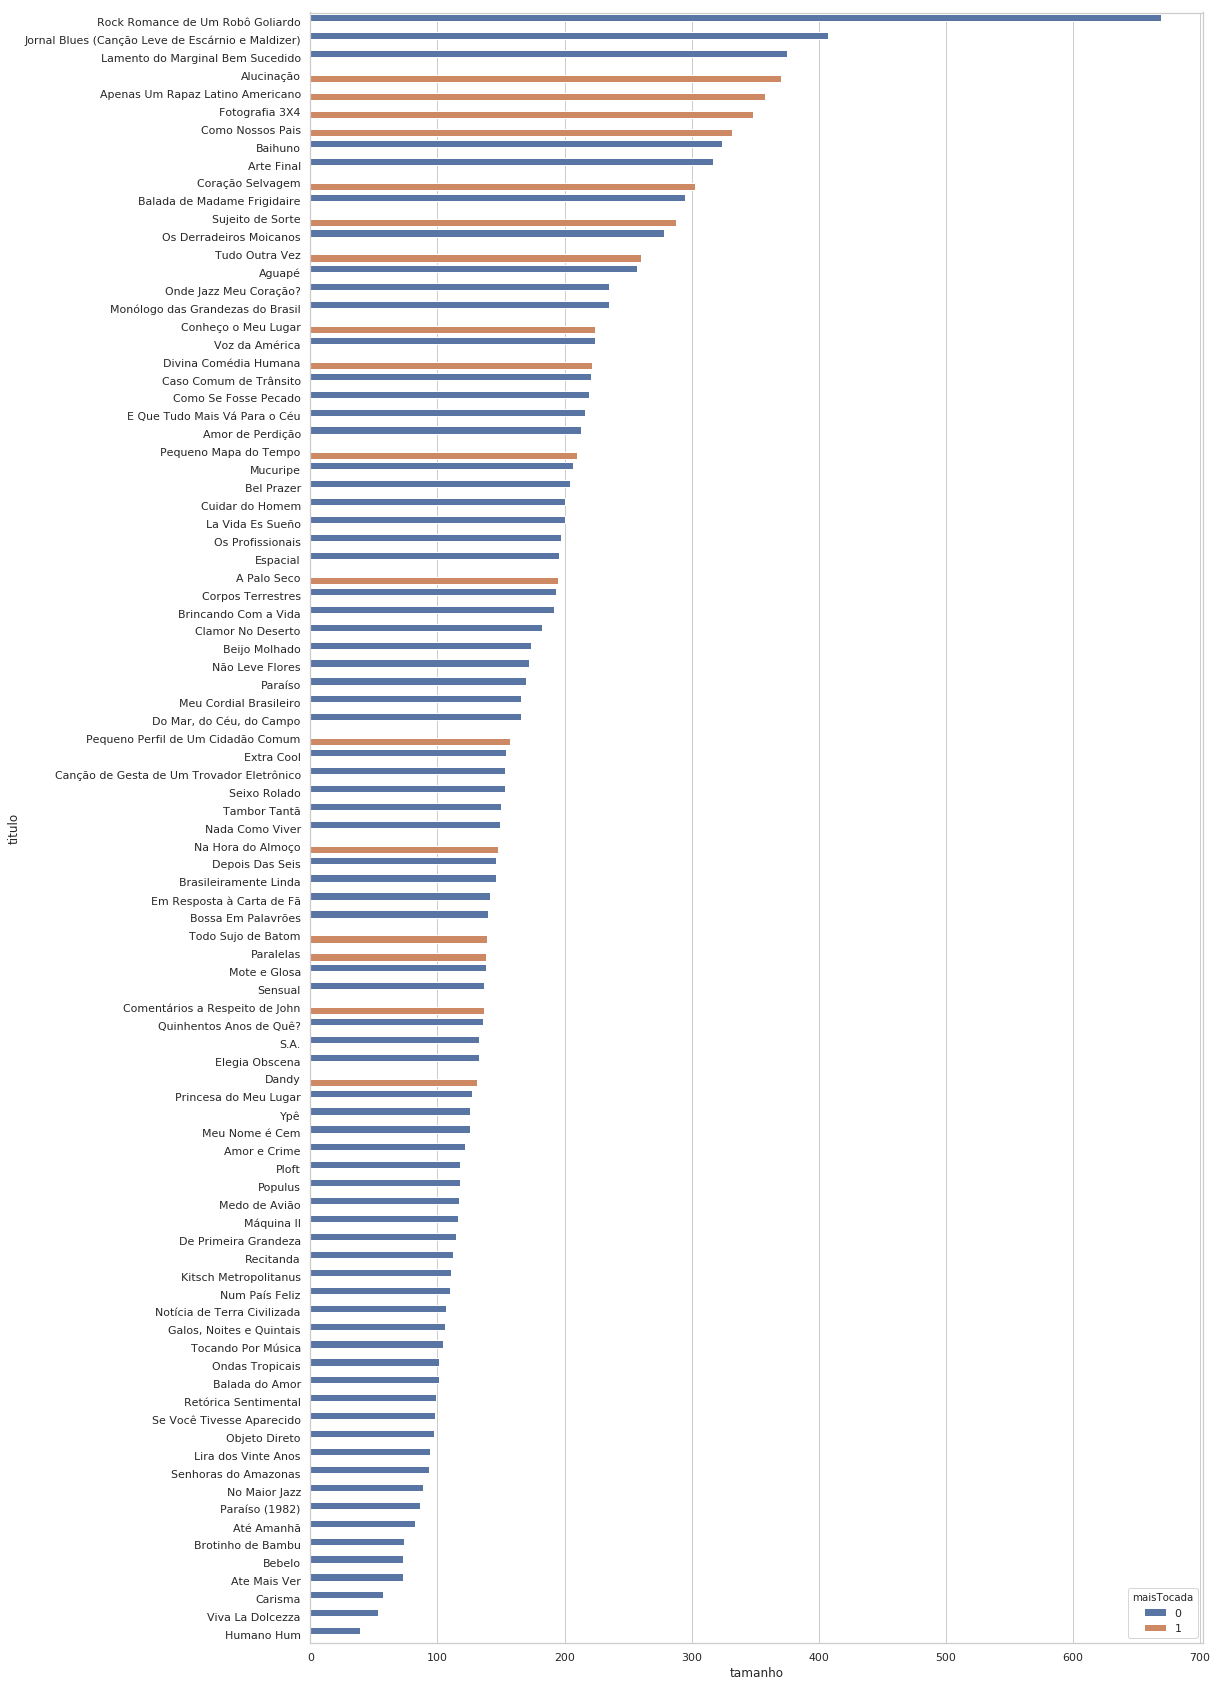

In [338]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
sns.barplot(y="titulo", x="tamanho", hue="maisTocada", data=df.sort_values(by='tamanho', ascending=False))

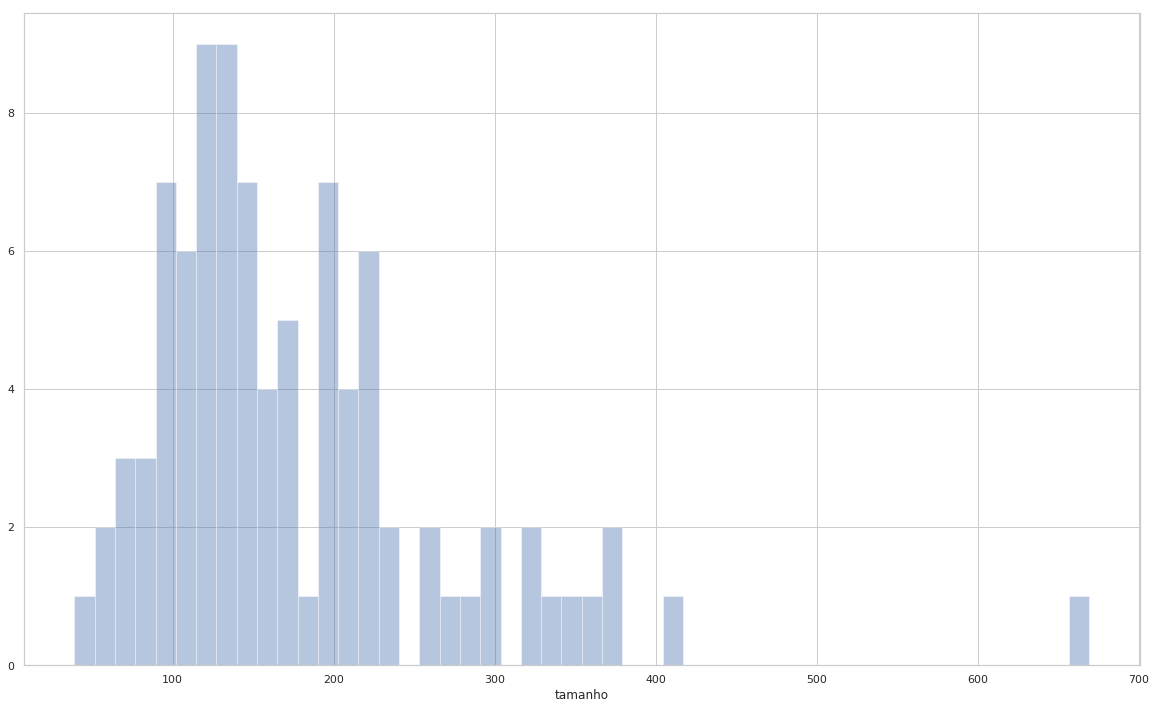

In [339]:
plt.figure(figsize=(20, 12))
sns.distplot(df['tamanho'], kde = False, bins = 50)

# Termos mais frequentes

## Remover stopwords

In [340]:
stopwords_pt = []
with open('stopwords.txt') as f:
       for line in f:
            line = line.replace(' ','')
            line = line.replace('\n','')
            stopwords_pt.append(line)
stopwords_pt.append('pra')
stopwords_pt.append('oh')
stopwords_pt.append('ô')
stopwords_pt.append('ah')
stopwords_pt.append('la')
stopwords_pt.append('lá')
stopwords_pt.append('uns')
stopwords_pt.append('eh')
stopwords_pt.append('n')
print(stopwords_pt)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estav

In [341]:
# stopwords em inglês
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/cabral/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [342]:
stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Limpeza e Normalização

In [343]:
def normalize_text(txt):
    txt = txt.lower()
    txt = txt.replace(',','')
    txt = txt.replace(';','')
    txt = txt.replace('.','')
    #txt = txt.replace('\'','')
    txt = txt.replace('(','')
    txt = txt.replace(')','')
    txt = txt.replace(':','')
    txt = txt.replace('!','')
    txt = txt.replace('?','')
    txt = txt.replace("\\","")
    txt = txt.replace("\"","")
    txt = txt.replace("`","")
    txt = txt.replace('</p>','')
    return txt

### Todas as letras em uma lista, removendo stopwords e normalizando

In [344]:
todas_letras = ' '.join(list(df['letra']))
todas_letras = normalize_text(todas_letras)
todas_letras

"se você vier me perguntar por onde andei no tempo em que você sonhava de olhos abertos lhe direi amigo eu me desesperava  sei que assim falando pensas que esse desespero é moda em 76 mas ando mesmo descontente desesperadamente eu grito em português mas ando mesmo descontente desesperadamente eu grito em português tenho vinte e cinco anos de sonho e de sangue e de américa do sul por força deste destino um tango argentino  me vai bem melhor que um blues sei que assim falando pensas que esse desespero é moda em 76 e eu quero é que esse canto torto feito faca corte a carne de vocês e eu quero é que esse canto torto feito faca corte a carne de vocês tenho vinte e cinco anos de sonho e de sangue e de américa do sul por força deste destino um tango argentino  me vai bem melhor que um blues sei que assim falando pensas que esse desespero é moda em 76 e eu quero é que esse canto torto feito faca corte a carne de vocês e eu quero é que esse canto torto feito faca corte a carne de vocês  capinei

In [345]:
len(todas_letras)

83698

## Tokenização

In [346]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/cabral/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [347]:
#tokeniza
from nltk import tokenize    
palavras= tokenize.word_tokenize(todas_letras, language='portuguese')
print(palavras[0:20])

['se', 'você', 'vier', 'me', 'perguntar', 'por', 'onde', 'andei', 'no', 'tempo', 'em', 'que', 'você', 'sonhava', 'de', 'olhos', 'abertos', 'lhe', 'direi', 'amigo']


In [348]:
#remove stopwords
from string import punctuation
stopwords = set(stopwords_pt + list(punctuation) + stopwords_en)
tokens = [palavra for palavra in palavras if palavra not in stopwords]
print(tokens[0:20])

['vier', 'perguntar', 'onde', 'andei', 'tempo', 'sonhava', 'olhos', 'abertos', 'direi', 'amigo', 'desesperava', 'sei', 'assim', 'falando', 'pensas', 'desespero', 'moda', '76', 'ando', 'descontente']


## Keywords

In [349]:
from collections import Counter
def get_keywords(text, n):
    text = normalize_text(text)
    stopwords = set(stopwords_pt + list(punctuation) + stopwords_en)
    palavras= tokenize.word_tokenize(text, language='portuguese')
    tokens = [palavra for palavra in palavras if palavra not in stopwords]
    keywords = Counter(tokens).most_common(n)
    return keywords    

In [350]:
get_keywords(df['letra'][0],3)[0][0]

'quero'

In [351]:
keywords = []
for letra in list(df['letra']):
    top = get_keywords(letra,3)
    kw = ''
    for tup in top:        
        kw = kw + tup[0] + ', '
    kw = kw[0:-2]
    keywords.append(kw)
        

In [352]:
df['keywords'] = keywords
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",3.440392,-1.181395
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",2.723050,-2.094381
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar",0.177295,-1.151505
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa",2.040058,-3.004796
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas",2.513807,-3.100136


In [353]:
df[df['tamanho']==197]

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
65,Os Profissionais,0,Onde anda o tipo afoito Que em 1-9-6-8 Queria ...,197,0.198167,0.458772,Neutro,"poder, amor, vida",3.104453,-0.785494


## Distribuição de frequências

In [354]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
fdist = FreqDist()
for word in tokens:
    fdist[word.lower()] += 1

In [355]:
df_freq = pd.DataFrame(list(fdist.items()), columns = ["termo","frequencia"])
df_freq.head(10)

,termo,frequencia
0,vier,7
1,perguntar,1
2,onde,31
3,andei,3
4,tempo,33
5,sonhava,2
6,olhos,4
7,abertos,1
8,direi,3
9,amigo,13


In [356]:
df_freq.sort_values(by='frequencia', ascending=False).head(10)

,termo,frequencia
113,nada,79
222,amor,77
223,vida,73
287,tudo,68
39,quero,61
537,novo,53
1689,medo,51
36,bem,47
446,vem,37
207,rock,37


In [357]:
df_freq.sort_values(by='frequencia', ascending=True).head(10)

,termo,frequencia
3070,capitão,1
3118,tupi,1
3117,índia,1
2758,luís,1
1660,grana,1
1661,feira,1
1662,reles,1
1656,instintos,1
1663,conformista,1
1665,satisfaz,1


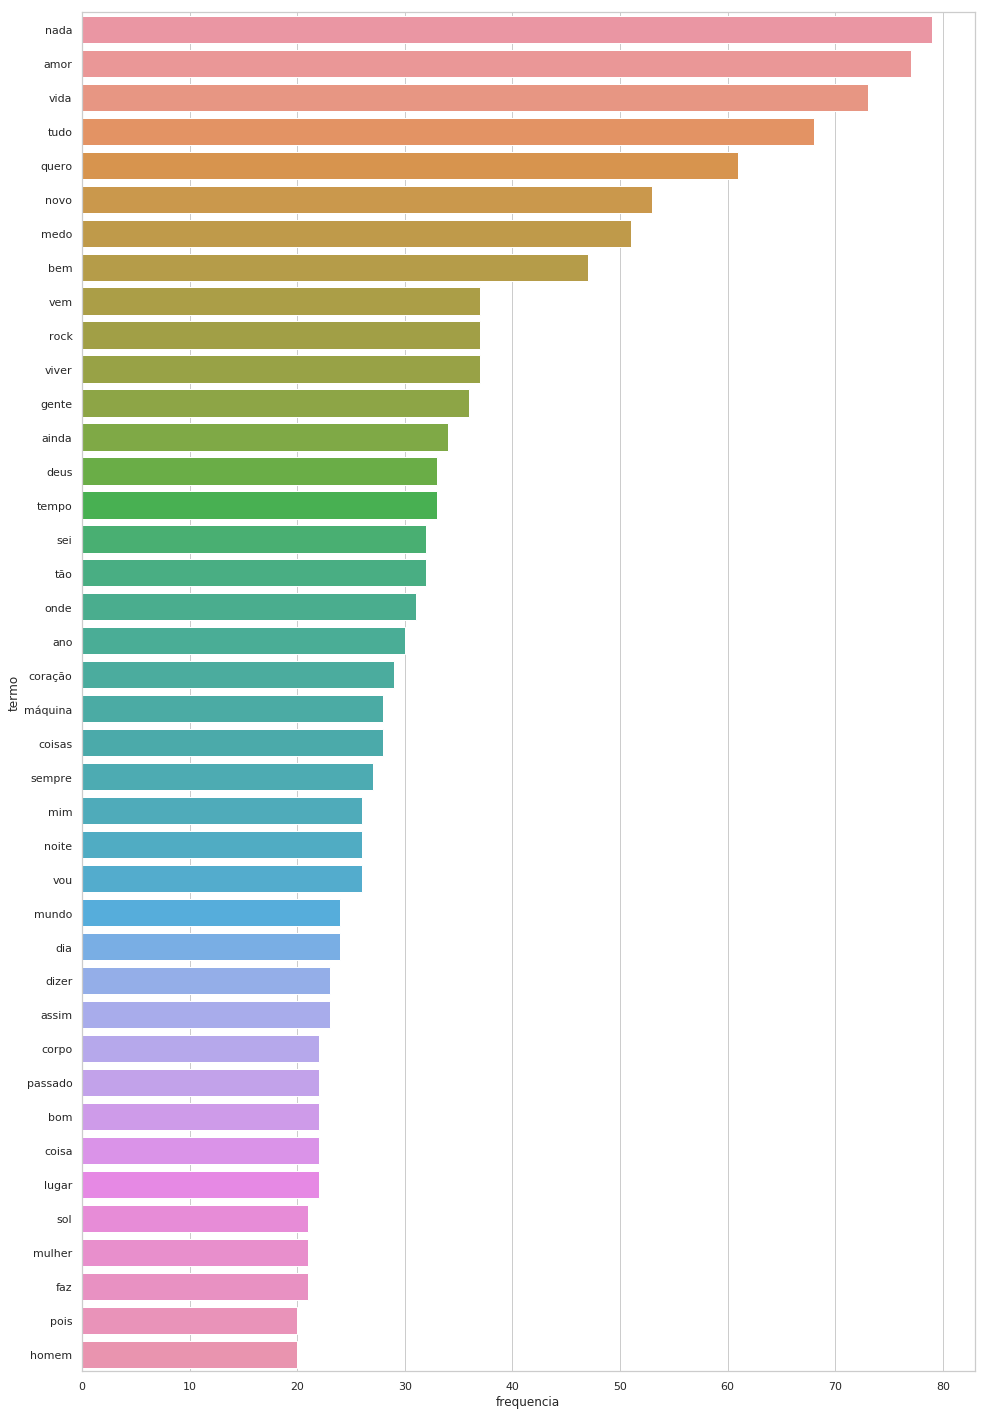

In [358]:
plt.figure(figsize=(16, 25))
sns.barplot(y="termo", x="frequencia", data=df_freq.sort_values(by='frequencia', ascending=False).head(40))

## Identificando as músicas onde os tokens ocorrem

In [359]:
musicas = []
for palavra in df_freq['termo']:
    musicas_de_palavra = ''
    for letra, titulo in zip(df['letra'],df['titulo']):
        letra = letra.lower()
        if palavra in letra:
            musicas_de_palavra += titulo + ', '
    musicas_de_palavra = musicas_de_palavra[0:-2]
    musicas.append(musicas_de_palavra)        

In [360]:
df_freq['musicas'] = musicas
df_freq.head(10)

,termo,frequencia,musicas
0,vier,7,"A Palo Seco, Cuidar do Homem, Os Derradeiros M..."
1,perguntar,1,"A Palo Seco, Baihuno"
2,onde,31,"A Palo Seco, Arte Final, Baihuno, Bel Prazer, ..."
3,andei,3,"A Palo Seco, Balada de Madame Frigidaire, Bel ..."
4,tempo,33,"A Palo Seco, Baihuno, Bossa Em Palavrões, Caso..."
5,sonhava,2,"A Palo Seco, Num País Feliz"
6,olhos,4,"A Palo Seco, Fotografia 3X4, Paraíso, Princesa..."
7,abertos,1,A Palo Seco
8,direi,3,"A Palo Seco, Cuidar do Homem, Divina Comédia H..."
9,amigo,13,"A Palo Seco, Amor de Perdição, Apenas Um Rapaz..."


In [361]:
df_freq.sort_values(by='frequencia', ascending=False).head(10)

,termo,frequencia,musicas
113,nada,79,"Aguapé, Apenas Um Rapaz Latino Americano, Arte..."
222,amor,77,"Alucinação, Amor de Perdição, Amor e Crime, At..."
223,vida,73,"Alucinação, Apenas Um Rapaz Latino Americano, ..."
287,tudo,68,"Amor e Crime, Apenas Um Rapaz Latino Americano..."
39,quero,61,"A Palo Seco, Balada do Amor, Bel Prazer, Brinc..."
537,novo,53,"Ate Mais Ver, Caso Comum de Trânsito, Clamor N..."
1689,medo,51,"De Primeira Grandeza, Kitsch Metropolitanus, M..."
36,bem,47,"A Palo Seco, Amor de Perdição, Arte Final, Bal..."
446,vem,37,"Arte Final, Até Amanhã, Brasileiramente Linda,..."
207,rock,37,"Alucinação, Arte Final, Beijo Molhado, Canção ..."


In [362]:
df_freq.sort_values(by='frequencia', ascending=True).head()

,termo,frequencia,musicas
3070,capitão,1,Quinhentos Anos de Quê?
3118,tupi,1,Retórica Sentimental
3117,índia,1,Retórica Sentimental
2758,luís,1,Os Derradeiros Moicanos
1660,grana,1,"Dandy, E Que Tudo Mais Vá Para o Céu, Monólogo..."


## Lemmatization

Download do modelo: https://github.com/explosion/spacy-models/releases/tag/pt_core_news_sm-2.2.5

ou

python -m spacy download pt

lemma = []
for token in nlp(todas_letras):
    lemma.append(token.lemma_ + "\t")

# nGramas

In [363]:
from nltk import ngrams
n = 3
#nGrams = ngrams(todas_letras.split(), n)
nGrams = ngrams(tokens, n)

In [364]:
list_grams = []
for grams in nGrams:
    #print(grams[0])
    #grams = grams[0] + ' ' + grams[1]
    grams = ' '.join(list(grams))
    list_grams.append(grams.strip())
    
print(list_grams)

['vier perguntar onde', 'perguntar onde andei', 'onde andei tempo', 'andei tempo sonhava', 'tempo sonhava olhos', 'sonhava olhos abertos', 'olhos abertos direi', 'abertos direi amigo', 'direi amigo desesperava', 'amigo desesperava sei', 'desesperava sei assim', 'sei assim falando', 'assim falando pensas', 'falando pensas desespero', 'pensas desespero moda', 'desespero moda 76', 'moda 76 ando', '76 ando descontente', 'ando descontente desesperadamente', 'descontente desesperadamente grito', 'desesperadamente grito português', 'grito português ando', 'português ando descontente', 'ando descontente desesperadamente', 'descontente desesperadamente grito', 'desesperadamente grito português', 'grito português vinte', 'português vinte cinco', 'vinte cinco anos', 'cinco anos sonho', 'anos sonho sangue', 'sonho sangue américa', 'sangue américa sul', 'américa sul força', 'sul força deste', 'força deste destino', 'deste destino tango', 'destino tango argentino', 'tango argentino vai', 'argentino 

In [365]:
ngramfd = FreqDist()
for word in list_grams:
    ngramfd[word] += 1

In [366]:
ngramfd

FreqDist({'máquina máquina máquina': 24, 'novo novo novo': 24, 'nada nada nada': 22, 'rock rock rock': 15, 'medo medo medo': 15, 'ano passado morri': 12, 'passado morri ano': 12, 'morri ano morro': 12, 'belo belo belo': 7, 'vida es sueño': 7, ...})

In [367]:
df_ngramfd = pd.DataFrame(list(ngramfd.items()), columns = ["ngram","frequencia"])
df_ngramfd.sort_values(by='frequencia', ascending=False).head(15)

,ngram,frequencia
4820,novo novo novo,24
4504,máquina máquina máquina,24
147,nada nada nada,22
4915,medo medo medo,15
1722,rock rock rock,15
7140,ano passado morri,12
7141,passado morri ano,12
7142,morri ano morro,12
4127,vida es sueño,7
4501,u q u,7


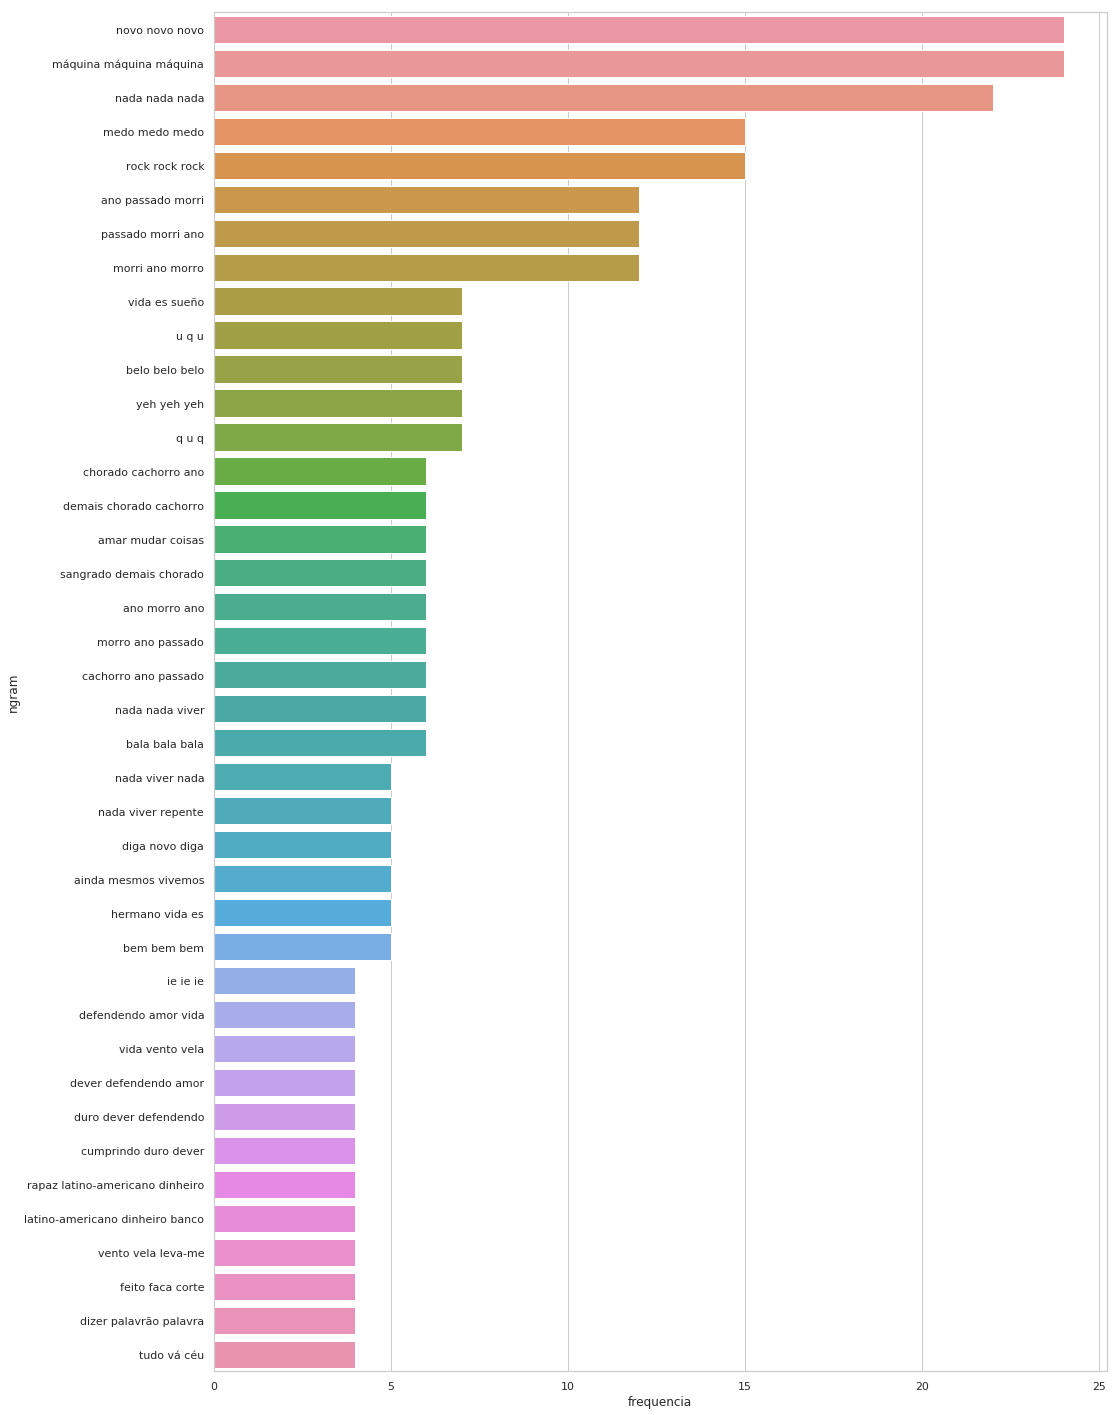

In [368]:
plt.figure(figsize=(16, 25))
sns.barplot(y="ngram", x="frequencia", data=df_ngramfd.sort_values(by='frequencia', ascending=False).head(40))

# Similaridade entre músicas

In [369]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

In [370]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list(df['letra']))
df_tdm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = df['titulo'])
df_tdm.head()

,3x4,45,76,abacaxi,abaixo,abandona,abandonada,abandonados,abandonei,abandono,...,ídolo,ídolos,índia,índio,índios,íris,óculos,ópio,último,úteis
titulo,,,,,,,,,,,,,,,,,,,,,
A Palo Seco,0.0,0.0,0.196285,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Aguapé,0.0,0.0,0.000000,0.0,0.0,0.0,0.048708,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Alucinação,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Amor de Perdição,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Amor e Crime,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112491


In [371]:
df_tdm.iloc[0].index

Index(['3x4', '45', '76', 'abacaxi', 'abaixo', 'abandona', 'abandonada',
       'abandonados', 'abandonei', 'abandono',
       ...
       'ídolo', 'ídolos', 'índia', 'índio', 'índios', 'íris', 'óculos', 'ópio',
       'último', 'úteis'],
      dtype='object', length=3535)

In [372]:
cosine_sim = cosine_similarity(X,X)

In [373]:
df_similar = pd.DataFrame(cosine_sim,columns = df['titulo'], index = df['titulo'])
df_similar.head(10)

titulo,A Palo Seco,Aguapé,Alucinação,Amor de Perdição,Amor e Crime,Apenas Um Rapaz Latino Americano,Arte Final,Até Amanhã,Ate Mais Ver,Baihuno,...,Senhoras do Amazonas,Sensual,Sujeito de Sorte,Tambor Tantã,Tocando Por Música,Todo Sujo de Batom,Tudo Outra Vez,Viva La Dolcezza,Voz da América,Ypê
titulo,,,,,,,,,,,,,,,,,,,,,
A Palo Seco,1.000000,0.027902,0.042774,0.058535,0.047133,0.132026,0.101326,0.027306,0.047725,0.124397,...,0.046398,0.112512,0.114555,0.126857,0.090991,0.182657,0.129905,0.022006,0.158540,0.049432
Aguapé,0.027902,1.000000,0.042920,0.076837,0.043495,0.211651,0.095615,0.004935,0.173596,0.077467,...,0.030498,0.053732,0.024322,0.056889,0.056819,0.049357,0.066272,0.015377,0.091281,0.049262
Alucinação,0.042774,0.042920,1.000000,0.056670,0.075335,0.096595,0.088817,0.017930,0.087178,0.083604,...,0.040298,0.078345,0.041372,0.069764,0.064296,0.076249,0.112549,0.021988,0.116845,0.027229
Amor de Perdição,0.058535,0.076837,0.056670,1.000000,0.128680,0.076233,0.069618,0.037304,0.079344,0.097338,...,0.066613,0.073106,0.032627,0.111421,0.074142,0.066550,0.092037,0.019572,0.154890,0.089934
Amor e Crime,0.047133,0.043495,0.075335,0.128680,1.000000,0.164756,0.092877,0.031301,0.066994,0.122411,...,0.064338,0.073298,0.032095,0.130133,0.063165,0.055136,0.110917,0.024850,0.136873,0.073796
Apenas Um Rapaz Latino Americano,0.132026,0.211651,0.096595,0.076233,0.164756,1.000000,0.141968,0.077071,0.122089,0.144871,...,0.056691,0.131954,0.116524,0.122183,0.154090,0.134506,0.174995,0.025043,0.167227,0.098677
Arte Final,0.101326,0.095615,0.088817,0.069618,0.092877,0.141968,1.000000,0.062220,0.081130,0.144903,...,0.038818,0.063885,0.041137,0.085364,0.106377,0.058578,0.117771,0.055632,0.118689,0.043758
Até Amanhã,0.027306,0.004935,0.017930,0.037304,0.031301,0.077071,0.062220,1.000000,0.018184,0.041688,...,0.023873,0.026491,0.020809,0.041271,0.021077,0.018843,0.082593,0.060838,0.022673,0.051115
Ate Mais Ver,0.047725,0.173596,0.087178,0.079344,0.066994,0.122089,0.081130,0.018184,1.000000,0.119299,...,0.068939,0.085652,0.024931,0.105197,0.045429,0.058149,0.049141,0.028897,0.095445,0.046069


In [374]:
df_similar.shape

(91, 91)

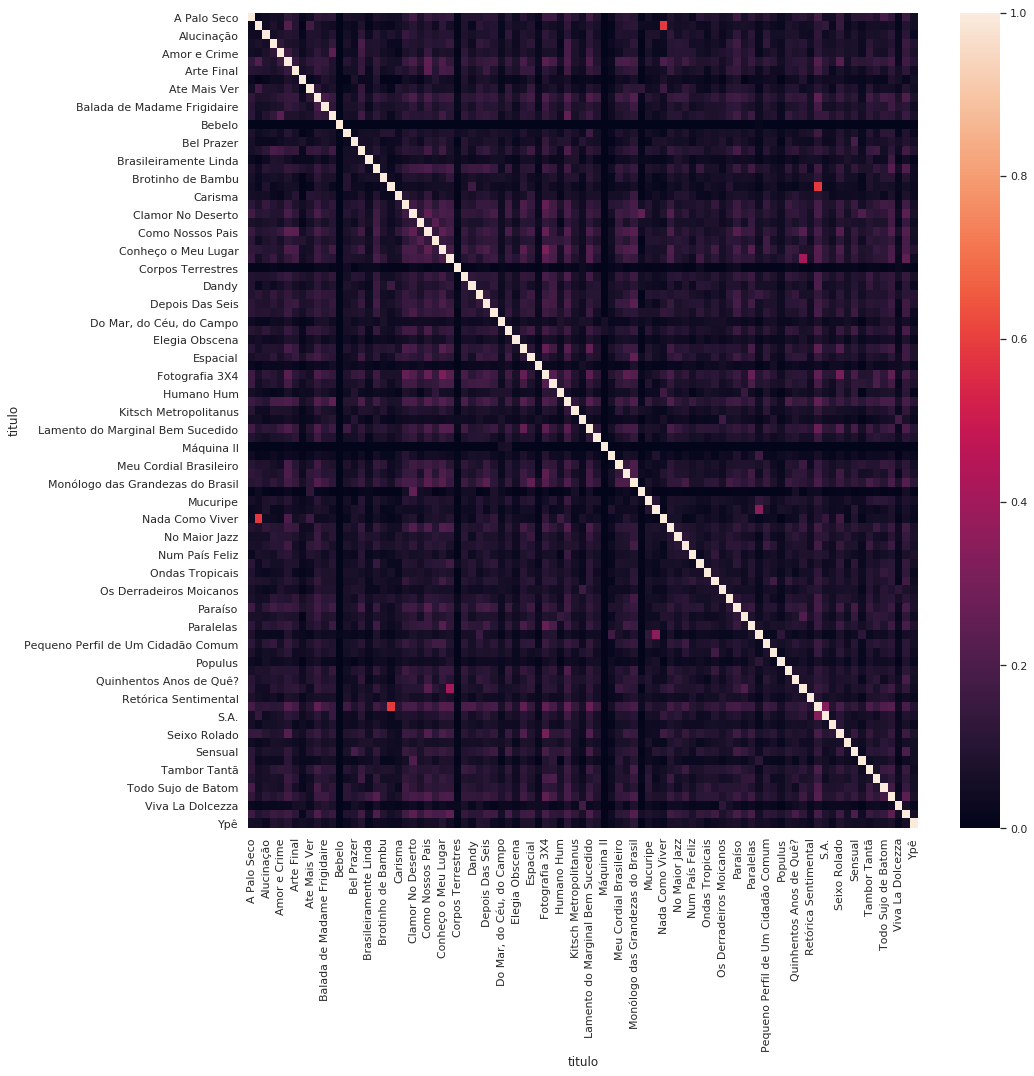

In [375]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_similar, annot=False)

## Scatterplot

In [376]:
import umap
reducer = umap.UMAP()

In [377]:
embedding = reducer.fit_transform(df_tdm)
embedding.shape

(91, 2)

In [378]:
df_scatter = pd.DataFrame(embedding,index = df['titulo'], columns=['x','y'])

In [379]:
df_scatter.head()

,x,y
titulo,,
A Palo Seco,-3.267795,1.170483
Aguapé,-4.150635,0.042792
Alucinação,-1.126338,-0.820493
Amor de Perdição,-0.494782,1.414559
Amor e Crime,-0.760978,2.014591


In [380]:
df['x'] = list(df_scatter['x'])
df['y'] = list(df_scatter['y'])
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",-3.267795,1.170483
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",-4.150635,0.042792
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar",-1.126338,-0.820493
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa",-0.494782,1.414559
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas",-0.760978,2.014591


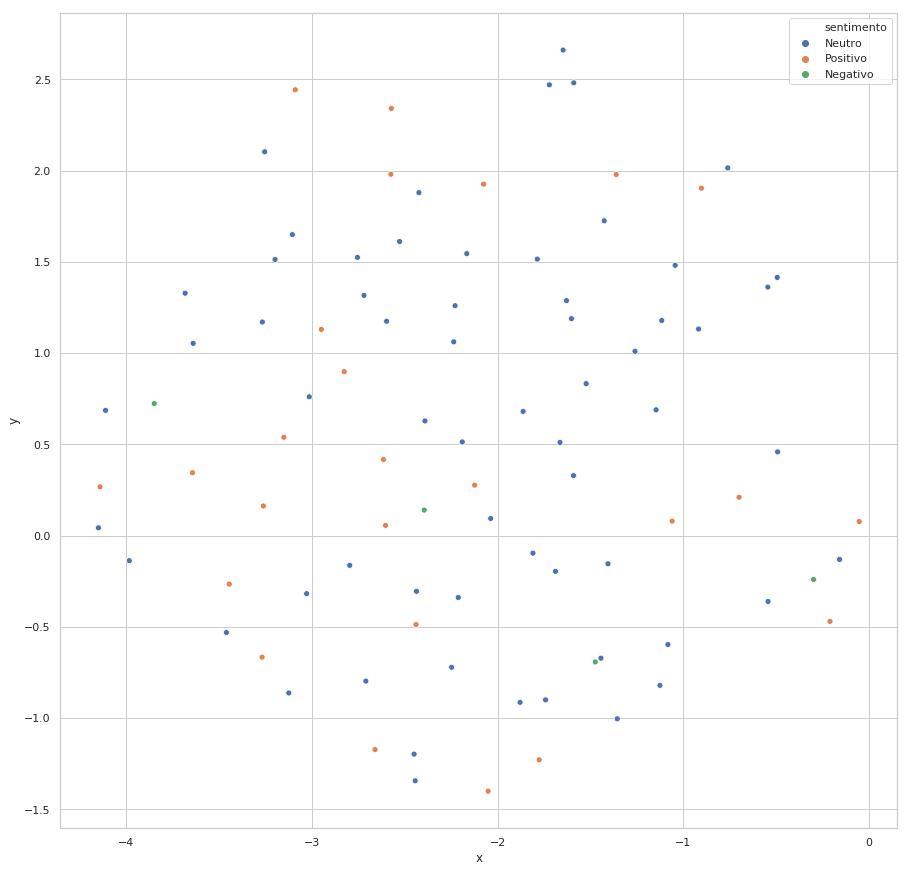

In [381]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="x", y="y", hue = 'sentimento', data=df)

https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/

# Análise de sentimento

In [382]:
from textblob import TextBlob

In [383]:
df['letra'][0]

'Se você vier me perguntar por onde andei No tempo em que você sonhava De olhos abertos, lhe direi Amigo, eu me desesperava  Sei que assim falando pensas Que esse desespero é moda em 76 Mas ando mesmo descontente Desesperadamente, eu grito em português Mas ando mesmo descontente Desesperadamente, eu grito em português Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues Sei que assim falando pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, corte a carne de vocês Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues Sei que assim falando, pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, corte a carne de vocês

In [384]:
palo_seco = TextBlob(df['letra'][0])
traducao = TextBlob(str(palo_seco.translate(to='en')))
traducao

TextBlob("If you come ask me where I've been In the days when you dreamed With your eyes open I'll tell you Friend I was desperate I know so speaking you think That despair is fashionable in 76 But I'm really displeased Desperately I scream in Portuguese Desperately, I scream in Portuguese I'm twenty-five From dream and blood And from South America By virtue of this fate An Argentine tango Goes so much better than a blues I know that so you think That despair is fashionable in 76 And I I want is this crooked corner Made knife, cut your flesh And I want is this crooked corner Made knife, cut your flesh I'm twenty-five From dream and blood And from South America By force of this fate One Argentine tango Goes a lot better than a blues I know so to speak, you think That despair is fashionable in 76 And I want is that crooked corner Made knife, cut your flesh And I want is that crooked corner Made knife, cut your flesh")

In [385]:
traducao.sentiment

Sentiment(polarity=-0.05454545454545456, subjectivity=0.4636363636363635)

In [386]:
def get_polarity_subjectivity(text):
    lyric = TextBlob(text)
    if lyric.detect_language() != 'en':
        lyric = TextBlob(str(lyric.translate(to='en')))        
    polarity = lyric.polarity
    subjectivity = lyric.subjectivity
    return polarity, subjectivity

In [387]:
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",-3.267795,1.170483
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",-4.150635,0.042792
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar",-1.126338,-0.820493
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa",-0.494782,1.414559
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas",-0.760978,2.014591


In [388]:
df.describe()

,maisTocada,tamanho,polaridade,subjetividade,x,y
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.186813,177.109890,0.124177,0.502077,-2.134945,0.527962
std,0.391921,95.542132,0.167328,0.133715,1.007318,1.037633
min,0.000000,39.000000,-0.421795,0.000000,-4.150635,-1.400126
25%,0.000000,115.500000,0.037266,0.424250,-2.811989,-0.285489
50%,0.000000,149.000000,0.137500,0.508333,-2.191041,0.510716
75%,0.000000,214.500000,0.207425,0.571408,-1.435333,1.322300
max,1.000000,669.000000,0.850000,1.000000,-0.053147,2.660379


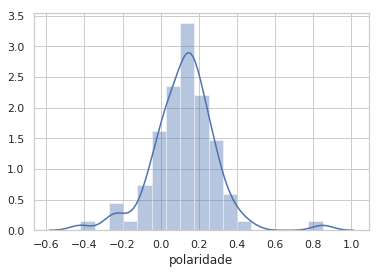

In [389]:
#plt.figure(figsize=(20, 12))
sns.distplot(df['polaridade'])

In [390]:
df[df['polaridade'] < 0].sort_values(by='polaridade', ascending=True)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
69,Pequeno Mapa do Tempo,1,Eu tenho medo e medo está por fora O medo anda...,210,-0.421795,0.772009,Negativo,"medo, belém, buscar",-0.298764,-0.240426
36,Elegia Obscena,0,"Meu bem, admire o meu carro e goze sozinha, en...",133,-0.266654,0.527778,Negativo,"oooh, bed, saberá",-2.396078,0.139758
85,Tocando Por Música,0,Aluguei minha canção Pra pagar meu aluguel E u...,104,-0.237037,0.562963,Negativo,"pagar, dinheiro, anos",-1.474729,-0.692018
78,S.A.,0,"Assaltantes, bêbados, índios Nordestinos retir...",133,-0.231921,0.400000,Negativo,"querem, onde, vem",-3.850330,0.723591
37,Em Resposta à Carta de Fã,0,"Baby, respondo enfim aquela carta de fã que vo...",141,-0.174369,0.689394,Neutro,"canção, ora, poema",-1.879743,-0.913435
32,Depois Das Seis,0,"Quando a fábrica apitou e o trabalho terminou,...",146,-0.091364,0.355000,Neutro,"todo, vem, faz",-1.406260,-0.154222
72,Populus,0,"Populus, meu cão... O escravo, indiferente, qu...",118,-0.089286,0.440476,Neutro,"populus, cão, sobre",-0.544246,-0.360772
57,Não Leve Flores,0,"Não cante vitória muito cedo, não Nem leve flo...",172,-0.082500,0.650833,Neutro,"inimigo, sim, amigos",-2.710370,-0.796840
47,Lira dos Vinte Anos,0,"Os filhos de Bob Dylan, clientes da Coca-cola ...",94,-0.062500,0.466667,Neutro,"filhos, bob, dylan",-2.229898,1.259563
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",-3.267795,1.170483


In [391]:
print('Porcentagem de músicas negativas: ',len(df[df['polaridade'] < 0])/len(df))

Porcentagem de músicas negativas:  0.16483516483516483


In [392]:
df[df['polaridade'] >0.2].sort_values(by='polaridade', ascending=False)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
12,Bebelo,0,b be bel b belo be belo belo bel be...,73,0.850000,1.000000,Positivo,"belo, bala, b",-0.053147,0.076924
28,Corpos Terrestres,0,Osculetur me oscule oris suis Ideo adolescentu...,193,0.465278,0.739815,Positivo,"mea, est, mihi",-3.090538,2.442605
16,Brasileiramente Linda,0,"Olha-me, oh, yes! oh, yes! Brasileiramente lin...",146,0.400562,0.635705,Positivo,"yes, amor, brasileiramente",-2.573067,2.340663
49,Medo de Avião,0,Foi por medo de avião Que eu segurei Pela prim...,117,0.383333,0.523810,Positivo,"yeh, toque, medo",-0.210431,-0.469850
67,Paraíso (1982),0,"Graças a Deus, eu perco sempre o juízo Meu par...",86,0.362374,0.506061,Positivo,"palavra, paraíso, dá-lhe",-3.644065,0.344456
66,Paraíso,0,Amo tua voz e tua cor E teu jeito de fazer amo...,170,0.337143,0.598810,Positivo,"tudo, gente, faz",-1.060539,0.079492
62,Ondas Tropicais,0,Serviço de alto falante ``voz de cristal`` e `...,101,0.319792,0.587500,Positivo,"luz, brasil, mulato",-2.950188,1.129789
70,Pequeno Perfil de Um Cidadão Comum,1,Era um cidadão comum como esses que se vê na r...,157,0.293301,0.517484,Positivo,"feito, sempre, gente",-2.051813,-1.400126
26,Conheço o Meu Lugar,1,O que é que pode fazer o homem comum Neste pre...,224,0.291731,0.428506,Positivo,"fazer, pessoa, homem",-1.776791,-1.228235
81,Senhoras do Amazonas,0,"Rio, vim saber de ti e vi. Vi teu tropical sem...",93,0.289583,0.535000,Positivo,"rio, vim, saber",-2.575435,1.979775


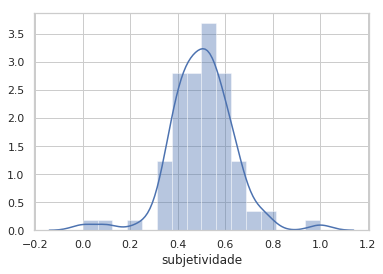

In [393]:
sns.distplot(df['subjetividade'])

In [394]:
df.sort_values(by='subjetividade', ascending=False).head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
12,Bebelo,0,b be bel b belo be belo belo bel be...,73,0.850000,1.000000,Positivo,"belo, bala, b",-0.053147,0.076924
69,Pequeno Mapa do Tempo,1,Eu tenho medo e medo está por fora O medo anda...,210,-0.421795,0.772009,Negativo,"medo, belém, buscar",-0.298764,-0.240426
90,Ypê,0,"Contemplo o rio, que corre parado E a dançarin...",126,0.052525,0.755556,Neutro,"pé, vede, ypê",-0.918359,1.132029
28,Corpos Terrestres,0,Osculetur me oscule oris suis Ideo adolescentu...,193,0.465278,0.739815,Positivo,"mea, est, mihi",-3.090538,2.442605
37,Em Resposta à Carta de Fã,0,"Baby, respondo enfim aquela carta de fã que vo...",141,-0.174369,0.689394,Neutro,"canção, ora, poema",-1.879743,-0.913435


In [395]:
df.sort_values(by='subjetividade', ascending=True).head(10)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
48,Máquina II,0,ê mê e m e m e a m a q u i q u ...,116,0.000000,0.000000,Neutro,"máquina, q, u",-3.640388,1.053497
42,Humano Hum,0,"Lavrar a palavra a pá, Como quem prepara um pã...",39,0.000000,0.100000,Neutro,"palavra, pão, lavrar",-4.112480,0.686279
7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,82,0.053247,0.242857,Neutro,"amanhã, homem, quiser",-2.450631,-1.197050
83,Sujeito de Sorte,1,Presentemente eu posso me considerar um sujeit...,288,0.099762,0.322857,Neutro,"ano, passado, morri",-3.125485,-0.862170
19,Canção de Gesta de Um Trovador Eletrônico,0,O som do alto falante Rolava e me dava um toqu...,153,0.061389,0.325000,Neutro,"rock, som, mil",-3.106051,1.649178
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",-4.150635,0.042792
32,Depois Das Seis,0,"Quando a fábrica apitou e o trabalho terminou,...",146,-0.091364,0.355000,Neutro,"todo, vem, faz",-1.406260,-0.154222
52,Monólogo das Grandezas do Brasil,0,Todo mundo sabe/todo mundo vê Que tenho sido a...,235,0.091863,0.358772,Neutro,"bom, ai, mundo",-1.603010,1.188525
84,Tambor Tantã,0,"Doutor em dor, bate o tambor, Tantã de tanto d...",150,0.279596,0.360784,Positivo,"fim, vier, tão",-2.076088,1.925619
88,Viva La Dolcezza,0,"Daqui da zona fantasma, te mando minha lagrima...",53,0.056818,0.372222,Neutro,"viva, dolcezza, daqui",-1.721953,2.469681


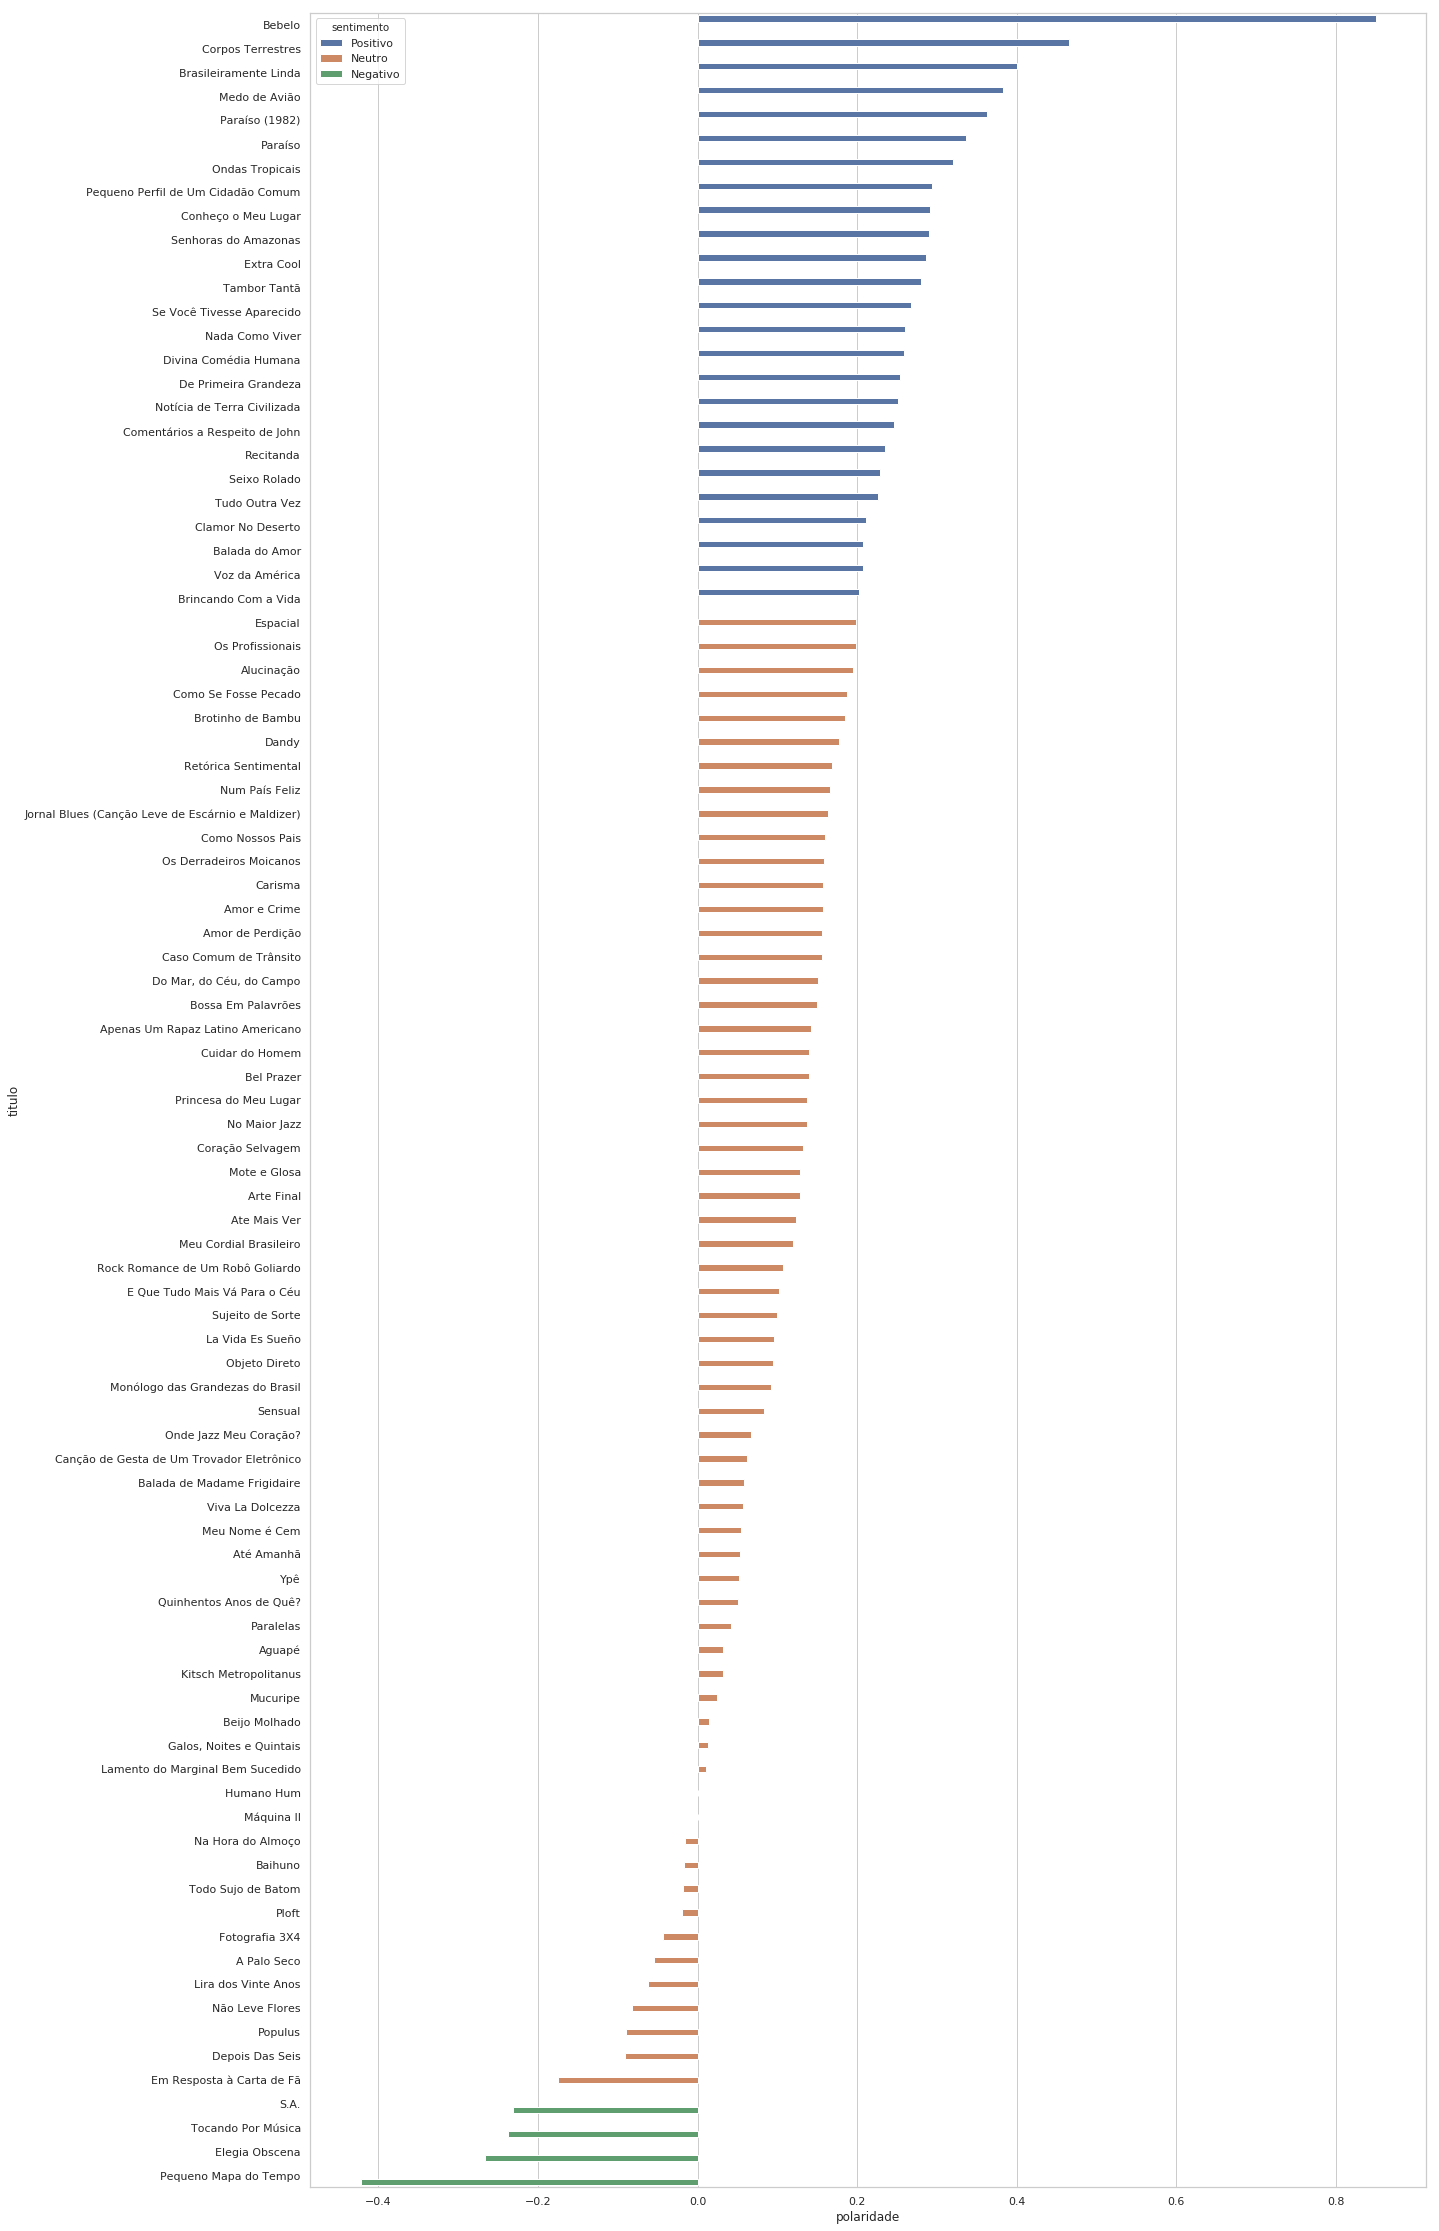

In [396]:
plt.figure(figsize=(20, 40))
sns.barplot(y="titulo", x="polaridade", hue = "sentimento", data=df.sort_values(by='polaridade', ascending=False))

In [397]:
def discretizar_polaridade(pol):
    if pol >= 0.2:
        return 'Positivo'
    elif pol >= -0.2:
        return 'Neutro'
    else:
        return 'Negativo'

In [398]:
def get_color_from_sentimento(sent):
    if sent == 'Neutro':
        return 'tan'
    elif sent == 'Positivo':
        return 'steelblue'
    else:
        return 'firebrick'

In [399]:
df['sentimento'] = df.apply(lambda x: discretizar_polaridade(x['polaridade']),axis=1)

In [400]:
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",-3.267795,1.170483
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",-4.150635,0.042792
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar",-1.126338,-0.820493
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa",-0.494782,1.414559
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas",-0.760978,2.014591


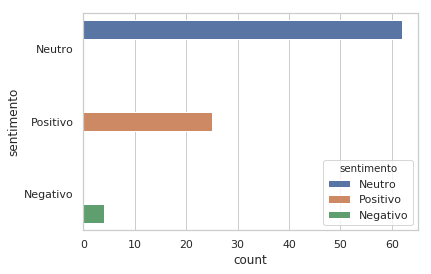

In [401]:
sns.countplot(y="sentimento", hue="sentimento", data=df)

<Figure size 1440x1440 with 0 Axes>

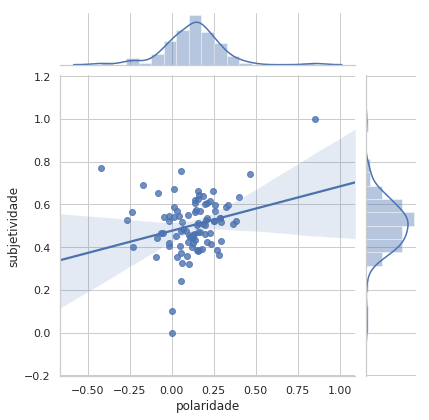

In [402]:
plt.figure(figsize=(20, 20))
sns.jointplot(x="polaridade", y="subjetividade", kind="reg", data=df);

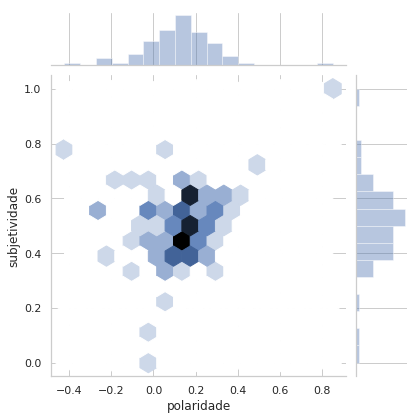

In [403]:
sns.jointplot(x="polaridade", y="subjetividade", kind = 'hex', data=df);

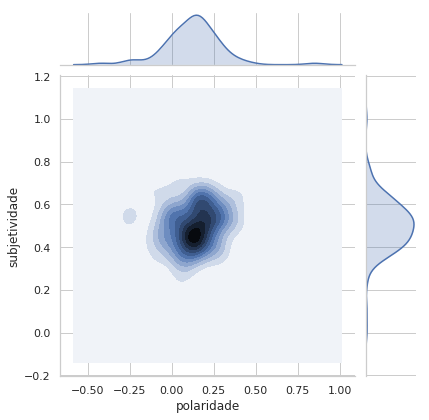

In [404]:
sns.jointplot(x="polaridade", y="subjetividade", kind = 'kde', data=df);

# Tópicos ocultos (Latent Semantic Analysis)

In [405]:
from gensim.models import LsiModel
from gensim import corpora

In [406]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

documents = list(df['letra'])

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [407]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]

In [408]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [409]:
lsi_model.print_topics(num_words=3)

[(0, '0.157*"quero" + 0.141*"tudo" + 0.131*"amor"'),
 (1, '0.601*"nada," + 0.476*"nada" + 0.151*"viver"'),
 (2, '0.488*"medo" + 0.322*"medo," + 0.139*"destina"'),
 (3, '0.189*"medo" + -0.175*"rock" + -0.154*"rock,"'),
 (4, '0.257*"medo" + 0.229*"medo," + -0.152*"hoje"'),
 (5, '0.351*"novo" + 0.166*"bem," + 0.157*"diga"'),
 (6, '0.214*"novo" + 0.131*"ai!" + -0.123*"canção"'),
 (7, '-0.192*"oh," + -0.184*"amor" + 0.160*"vá"'),
 (8, '-0.294*"novo" + -0.166*"oh," + 0.157*"fez"'),
 (9, '-0.153*"rock," + -0.147*"novo" + 0.129*"verdes"')]

# Text Network

# Salvando datasets 

In [410]:
df

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",-3.267795,1.170483
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",-4.150635,0.042792
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar",-1.126338,-0.820493
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa",-0.494782,1.414559
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas",-0.760978,2.014591
5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...,358,0.142548,0.572816,Neutro,"tudo, nada, apenas",-3.029483,-0.318276
6,Arte Final,0,"Desculpe qualquer coisa, passe outro dia, Agor...",317,0.128040,0.418286,Neutro,"dancei, ora, vem",-2.191041,0.513340
7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,82,0.053247,0.242857,Neutro,"amanhã, homem, quiser",-2.450631,-1.197050
8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont...",73,0.123674,0.442803,Neutro,"ate, ver, nada",-3.984551,-0.137345
9,Baihuno,0,Já que o tempo fez-te a graça de visitares o N...,324,-0.016784,0.520462,Neutro,"tão, mim, tempo",-2.720423,1.316467


In [412]:
df.to_csv('belchior.csv',index=False) #básico, contendo titulo da musica, letra, mais tocada, pol, sub e sentimento
df_freq.to_csv('belchior_dist_freq.csv',index=False) #token, e quantas vezes ocorre e em quais músicas
df_tdm.to_csv('belchior_tf_idf.csv',index=False) #matriz termo documento, vetorizado em tf-idf
df_similar.to_csv('belchior_similaridade.csv',index=True) #matriz de similaridade cosseno entre documentos
df_scatter.to_csv('belchior_2D.csv',index=False) #redução de dimensionalidade em 2D através de UMAP da vetorização dos documentos